# Dekomposisi Nilai Singular dan Kompresi Gambar

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [216]:
# import picture
cat_image = plt.imread("cat_1920x1280.jpg")
plt.imsave("cat_original.jpg", cat_image)

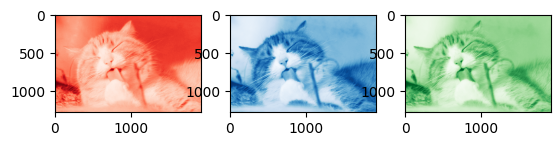

In [217]:
# Red Green and Blue layers
R = cat_image[:,:,0]
G = cat_image[:,:,1]
B = cat_image[:,:,2]

# print each layer
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds_r')
plt.subplot(1, 3, 2)
plt.imshow(B, cmap='Blues_r')
plt.subplot(1, 3, 3)
plt.imshow(G, cmap='Greens_r')

plt.savefig('cat_rgb.jpg')
plt.show()

In [218]:
# SVD for each channel
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

In [229]:
def show_image(i):
    R_compressed = np.array(np.matrix(U_R[:, :i]) * np.diag(S_R[:i]) * np.matrix(Vt_R[:i, :])).astype(np.uint8)
    G_compressed = np.array(np.matrix(U_G[:, :i]) * np.diag(S_G[:i]) * np.matrix(Vt_G[:i, :])).astype(np.uint8)
    B_compressed = np.array(np.matrix(U_B[:, :i]) * np.diag(S_B[:i]) * np.matrix(Vt_B[:i, :])).astype(np.uint8)

    im_new = np.stack((R_compressed, G_compressed, B_compressed), axis=2)
    plt.imshow(im_new)
    return im_new

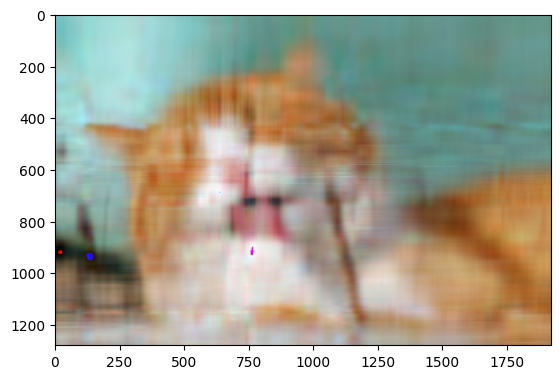

In [230]:
cat_10components = show_image(10)
plt.imsave("cat_10components.jpg", cat_10components)

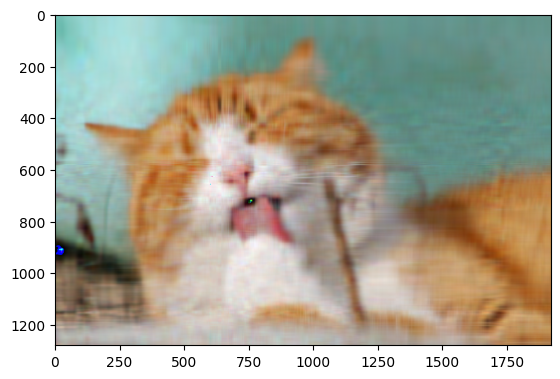

In [225]:
cat_20components = show_image(20)
plt.imsave("cat_20components.jpg", cat_20components)

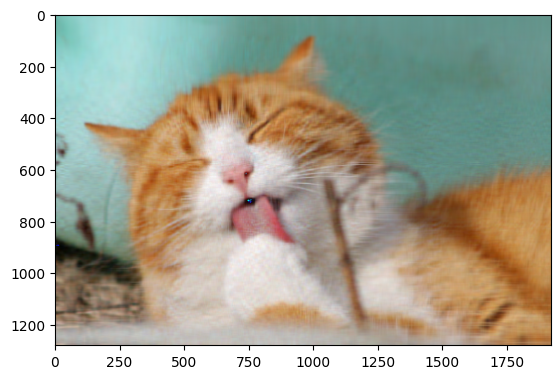

In [226]:
cat_40components = show_image(40)
plt.imsave("cat_40components.jpg", cat_40components)

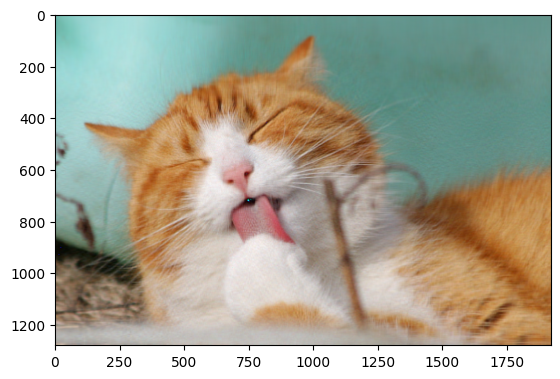

In [231]:
cat_80components = show_image(80)
plt.imsave("cat_80components.jpg", cat_80components)

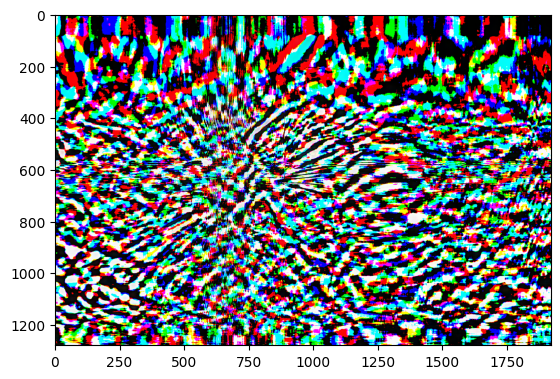

In [238]:
R_compressed = np.array(np.matrix(U_R[:, 20:40]) * np.diag(S_R[20:40]) * np.matrix(Vt_R[20:40, :])).astype(np.uint8)
G_compressed = np.array(np.matrix(U_G[:, 20:40]) * np.diag(S_G[20:40]) * np.matrix(Vt_G[20:40, :])).astype(np.uint8)
B_compressed = np.array(np.matrix(U_B[:, 20:40]) * np.diag(S_B[20:40]) * np.matrix(Vt_B[20:40, :])).astype(np.uint8)

cat_20to40components = np.stack((np.clip(R_compressed, 0, 255), np.clip(G_compressed,0,255), np.clip(B_compressed, 0,255)), axis=2)
plt.imshow(cat_20to40components)
plt.imsave("cat_20to40components.jpg", cat_20to40components)

In [240]:
import os

print(str(os.path.getsize('cat_original.jpg')/1024) + " kilobytes")
print(str(os.path.getsize('cat_80components.jpg')/1024) + " kilobytes")

204.3759765625 kilobytes
164.603515625 kilobytes
